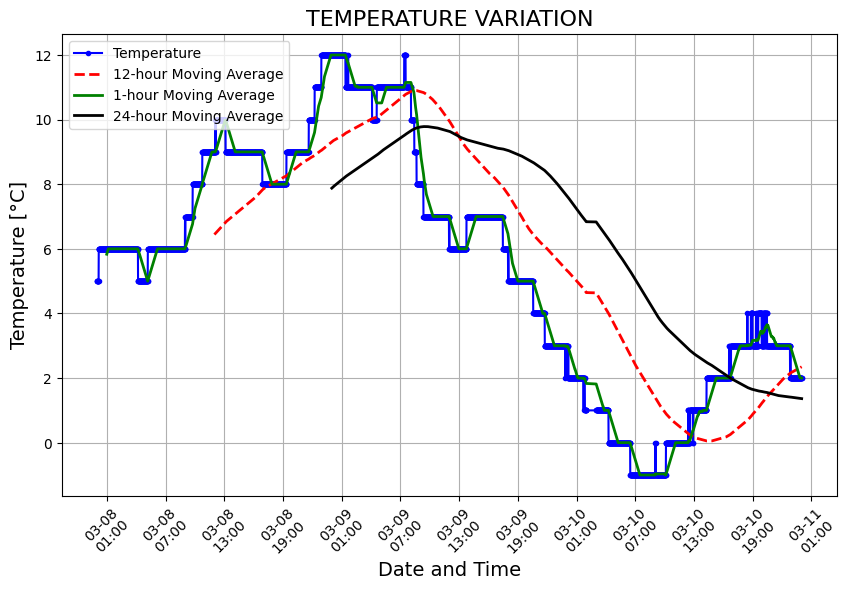

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, HourLocator
import datetime as dt
import mplcursors

# Nombre del archivo CSV
archivo_csv = "2024_03_11 CABR bridge temperature.csv"

# Importar el archivo CSV como DataFrame, omitiendo las primeras 5 filas
df0 = pd.read_csv(archivo_csv, skiprows=5, encoding='latin1')
df=df0
# Rename the third column to "Temp"
df = df.rename(columns={df.columns[2]: 'Temp'})

# Combine the date and time columns into a single datetime column
df['DateTime'] = df[df.columns[0]] + ' ' + df[df.columns[1]]
df['DateTime'] = df['DateTime'].apply(lambda x: 
                 dt.datetime.strptime(x, '%B %d, %Y %I:%M:%S %p'))

df.drop(columns=[df.columns[0],df.columns[1]], axis=1, inplace=True)

# Calcular la media móvil 
nr_hours = 12  # Media móvil de tantas horas
rolling_mean = df['Temp'].rolling(window= nr_hours * 60).mean()

nr_hours1 = 1  # Media móvil de tantas horas
rolling_mean1 = df['Temp'].rolling(window= nr_hours1 * 60).mean()

nr_hours24 = 24  # Media móvil de tantas horas
rolling_mean24 = df['Temp'].rolling(window= nr_hours24 * 60).mean()


# Configurar el gráfico
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico según tus preferencias

# Graficar los datos
plt.plot(df['DateTime'], df['Temp'], color='b', marker='.', linestyle='-')

# Graficar la media móvil
plt.plot(df['DateTime'], rolling_mean, color='r', linestyle='--', linewidth=2)


# Graficar la media móvil
plt.plot(df['DateTime'], rolling_mean1, color='g', linestyle='-', linewidth=2)

# Graficar la media móvil
plt.plot(df['DateTime'], rolling_mean24, color='k', linestyle='-', linewidth=2)

# Personalizar los ejes
plt.xlabel('Date and Time', fontsize=14)  # Etiqueta del eje x
plt.ylabel('Temperature [°C]', fontsize=14)  # Etiqueta del eje y

# Configurar el formato de las fechas
date_format = DateFormatter('%m-%d\n%H:%M')  # Formato de fecha 'MM-DD HH:MM'
plt.gca().xaxis.set_major_formatter(date_format)

# Configurar los marcadores de las fechas
plt.gca().xaxis.set_major_locator(HourLocator(interval=6))  # Mostrar etiquetas cada 6 horas

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Añadir título al gráfico
plt.title('TEMPERATURE VARIATION', fontsize=16)

# Mostrar la cuadrícula
plt.grid(True)

# Añadir leyenda
plt.legend(['Temperature', f'{nr_hours}-hour Moving Average',  f'{nr_hours1}-hour Moving Average', f'{nr_hours24}-hour Moving Average'], loc='upper left')

# Añadir anotaciones interactivas para mostrar las coordenadas al hacer clic
mplcursors.cursor(hover=True)

# Guardar el gráfico como PDF en tamaño A4 horizontal
plt.savefig('Temperature_plot.pdf', format='pdf', bbox_inches='tight')

# Mostrar el gráfico
#plt.tight_layout()  # Ajustar el diseño para que todo quepa correctamente
plt.show()

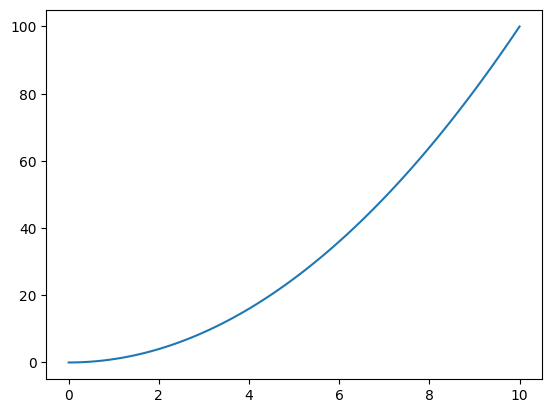

In [30]:
import numpy as np
import mplcursors

x= np.linspace(0,10,100)

y=x**2

plt.plot(x,y)
mplcursors.cursor(hover=False, highlight=True)